In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA_PATH = Path().resolve() / 'analisis-planillas-gobierno/datasets/MEDUCA-10-2022.xlsx'
DATA_PATH

PosixPath('/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/data-portfolio/analisis-planillas-gobierno/datasets/MEDUCA-10-2022.xlsx')

In [3]:
meduca = pd.read_excel(DATA_PATH, skiprows=4)
meduca.head(1)

Nombre  Apellido         Cédula  \
0  AARON  CARRILLO  8-0785-002235   

                                               Cargo  Salario  Gasto  \
0  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1814.21      0   

       Estado Fecha de inicio  Salario Total  
0  PERMANENTE      20/02/2019        1814.21

In [17]:
meduca_fechas = meduca.copy()
meduca_fechas["Fecha de inicio"] = pd.to_datetime(meduca_fechas["Fecha de inicio"])
meduca_fechas.rename(columns={"Fecha de inicio" : "fecha"},inplace=True)
meduca_fechas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nombre         60000 non-null  object        
 1   Apellido       60000 non-null  object        
 2   Cédula         60000 non-null  object        
 3   Cargo          60000 non-null  object        
 4   Salario        60000 non-null  float64       
 5   Gasto          60000 non-null  int64         
 6   Estado         60000 non-null  object        
 7   fecha          60000 non-null  datetime64[ns]
 8   Salario Total  60000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 4.1+ MB


/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_22929/141646501.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  meduca_fechas["Fecha de inicio"] = pd.to_datetime(meduca_fechas["Fecha de inicio"])


In [18]:
meduca_filtered = meduca_fechas[meduca_fechas["fecha"].dt.year >=1970]
meduca_filtered["fecha"].hist(bins=50)

<Axes: >

<Axes: >

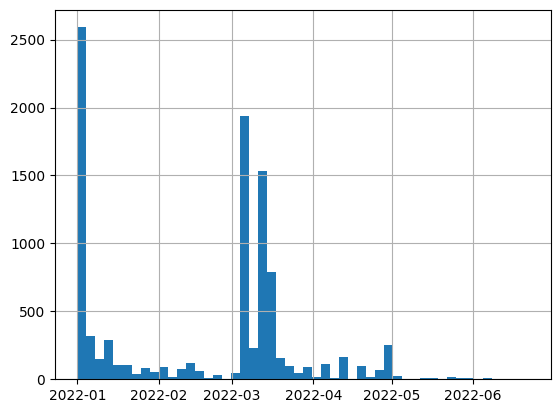

In [25]:
meduca_filtered = meduca_fechas[meduca_fechas["fecha"].dt.year >=2022]
meduca_filtered["fecha"].hist(bins=50)

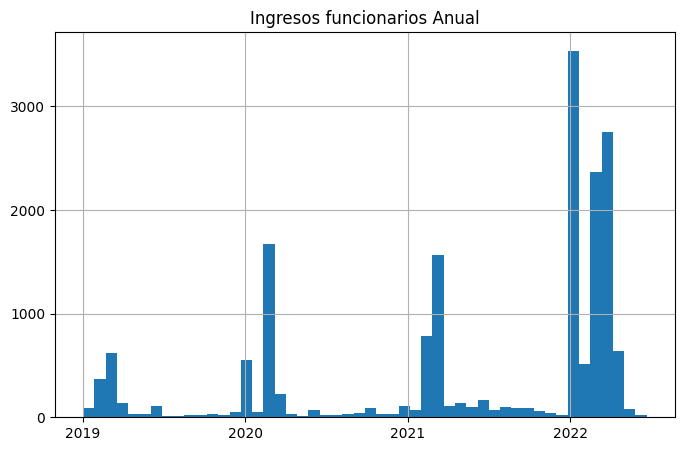

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import YearLocator, DateFormatter

# Assuming 'meduca_fechas' is your DataFrame with a column 'fecha'
meduca_filtered = meduca_fechas[meduca_fechas['fecha'].dt.year >= 2018]

# Create a histogram
ax = meduca_filtered['fecha'].hist(bins=50, figsize=(8, 5))

# Set the y-axis step to every 1000
y_major_locator = MultipleLocator(1000)
ax.yaxis.set_major_locator(y_major_locator)

# Set the x-axis locator and formatter to show only the year
x_year_locator = YearLocator()
x_year_formatter = DateFormatter('%Y')
ax.xaxis.set_major_locator(x_year_locator)
ax.xaxis.set_major_formatter(x_year_formatter)

# Add a title to the plot
plt.title('Ingresos funcionarios Anual')

# Show the plot
plt.show()
